In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

In [ ]:
data_file = "Data/Veriseti_Anadolu_Liseleri.xlsx"
data_original = pd.read_excel(data_file)
df_1 = data_original.copy()
df_1 = df_1.drop(columns=["okuladi", "okulno"])
df_1.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12


In [ ]:
df_1.iloc[:, -7:] = df_1.iloc[:, -7:].astype("int64")
df_1.dtypes

cinsiyet             int64
Asag                 int64
Bsag                 int64
Aoz                  int64
Boz                  int64
ABayri               int64
Abirlikte            int64
Aogrenim             int64
Bogrenim             int64
Acalisma             int64
Bcalisma             int64
gelir                int64
kardes               int64
oda                  int64
hastalik             int64
uyku                 int64
internet             int64
televizyon           int64
eba_tv               int64
oyun                 int64
ders_calisma         int64
okul_dyk             int64
ozel_kurs            int64
sosyal_kulturel      int64
ortaokul_turu        int64
ortaokul_kurs        int64
ortaokul_ozelders    int64
lgs_puani            int64
ortaokul_puani       int64
turkce9              int64
mat9                 int64
ort9                 int64
ort10                int64
ort11                int64
dtype: object

In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df_1[degisken].index:
    if df_1[degisken][i] ==0:
      df_1[degisken][i] = 1
    elif df_1[degisken][i]==1:
      df_1[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")
sifir_bir_duzelt("ortaokul_kurs")
sifir_bir_duzelt("ortaokul_ozelders")

In [ ]:
df_1.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,93,56,55,68,70,74
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,80,58,48,67,71,74
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,90,81,87,83,86,40
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,80,51,33,63,61,62
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,86,72,58,69,70,77


In [ ]:
data_file_tutum = "Data/Lise_TutumOlcegi.xlsx"
data_original_tutum = pd.read_excel(data_file_tutum)
df_tutum = data_original_tutum.copy()
df_tutum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,ALGILANAN OKUL YAŞANTILARI ÖLÇEĞİ,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,ÖZ DÜZENLEME ÖLÇEĞİ,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,AYDA SINAV KAYGISI ÖLÇEĞİ,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Öğrenci Notları,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,Okul Adı,Okul No,Cinsiyet,Anne sağ mı?,Baba sağ mı?,Anne öz mü?,Baba öz mü?,Anne-Baba birlikte mi?,Aile ile birlikte mi yaşıyorsunuz?,Anne öğrenim düzeyi,Baba öğrenim düzeyi,Anne çalışıyor mu?,Baba çalışıyor mu?,Gelir düzeyiniz ortalama aylık olarak nedir?,Kendiniz dahil aynı ailede yaşayan toplam kard...,Kendinize ait odanız var mı?,Kronik ya da kalıtsal bir hastalığınız var mı?,Günde kaç saat uyursunuz (ortalama olarak) ?,Günde kaç saat ders dışı internet kullanırsını...,Günlük ortalama olarak ne sıklıkta televizyon ...,EBA TV ve benzeri akademik ders içerikli telev...,İnternet haricinde günlük ortalama olarak ne s...,Günlük ortalama olarak kaç saat ders çalışırsı...,Okulda destekleme ve yetiştirme kursu alıyor m...,Okul DYK haricinde özel ders ya da kurs alıyor...,"Aşağıdaki Sosyal, Kültürel ve Sportif faaliyet...",Ortaokulda LGS sınavına girdiğiniz yıl gittiği...,Ortaokulda LGS sınav süreci boyunca takviye ku...,Ortaokulda LGS sınavı döneminde LGS sınavı kap...,8. Sınıf LGS yerleşme puanınız nedir?,Ortaokul mezuniyet notunuz nedir?,Öğretmenim öğrencilerine onların akademik perf...,Okulda alınan kararlar genellikle öğrenmek içi...,Öğretmenler öğrencilerin düzenli bir şekilde ö...,Okulum öğrencilerin öğrenmesine değer verir.,Okulla ilgili işlerimi yapabilecek yeteneğim o...,Okulda edindiğim deneyimlerin beni yetişkinliğ...,"Okulda şu ana kadar yaşadıklarımdan, edindiğim...",Okula karşı olumlu bir tutuma sahibim.,Okulda yeni bir şeyler öğrenmenin zorluğunu se...,...,Bu okulda öğrenci olmaktan gurur duyuyorum.,Bu okula ait olduğumu hissediyorum.,Okula gelmekten zevk alıyorum.,Okulumdaki öğretmenlerimle anlamlı ilişkilerim...,Eğer istersem en zor konuları bile rahatlıkla ...,Belirlediğim hedefler doğrultusunda çalışmalar...,Yeni bir konuyu rahatlıkla öğrenebilirim.,Bir konuyu anlamadığım zaman arkadaşlarımdan y...,Bir konuyu öğrenirken yenilikleri kolaylıkla f...,"Bir şeyler istemediğim şekilde giderse, bu dur...",Hatalarımdan öğrenebilirim.,"Bir konuyu öğrenirken, o dersteki notlarıma ba...","Bir konuyu öğrenirken, farklı yollar bulmaya ç...",Başarısız olduğumda çalışma yöntemimi değiştir...,Hedeflerime doğru ilerleme sürecimi takip edeb...,Bir konuyu öğrenirken karşılaştığım problemler...,Bir konuyu öğrenirken yapmış olduğum plana uya...,"Bir konuyu öğrenirken, başka yöntemler kullanm...",Çoğu zaman bir konuyu öğrenirken neler yaptığı...,Yanlış öğrendiğimi fark ettiğim şeyi değiştirm...,"Sınav yaklaştıkça heyecandan, ya bildiklerimi ...","Sınav günü yaklaştıkça kaydırma yaparsam, gerg...","Sınavda kötü sonuç alırsam, çevremdekilerin te...","Sınav yaklaştıkça daha çok çalışsaydım, daha f...","Sınavım kötü geçerse ailem ne der (sitem etme,...",Sınav günü yaklaştıkça çözemediğim konu/sorula...,Sınavda kötü sonuç alırsam sevdiğim insanların...,Sınav esnasında fizyolojik sorunlar (kalp atış...,Öncesinde çok çalışmama rağmen sınav günü hazı...,Başarısız olursam olacakları (ailenin üzülmesi...,Sınava fiziken bitkin girmek (stresten uyuyama...,Başa

In [ ]:
df_tutum_columns = list(df_tutum.loc[0,:])
df_tutum_columns

['Okul Adı',
 'Okul No',
 'Cinsiyet',
 'Anne sağ mı?',
 'Baba sağ mı?',
 'Anne öz mü?',
 'Baba öz mü?',
 'Anne-Baba birlikte mi?',
 'Aile ile birlikte mi yaşıyorsunuz?',
 'Anne öğrenim düzeyi',
 'Baba öğrenim düzeyi',
 'Anne çalışıyor mu?',
 'Baba çalışıyor mu?',
 'Gelir düzeyiniz ortalama aylık olarak nedir?',
 'Kendiniz dahil aynı ailede yaşayan toplam kardeş sayısı',
 'Kendinize ait odanız var mı?',
 'Kronik ya da kalıtsal bir hastalığınız var mı?',
 'Günde kaç saat uyursunuz (ortalama olarak) ?',
 'Günde kaç saat ders dışı internet kullanırsınız (ortalama olarak)?',
 'Günlük ortalama olarak ne sıklıkta televizyon izlersiniz?',
 'EBA TV ve benzeri akademik ders içerikli televizyon yayınlarını ne sıklıkta takip edersiniz?',
 'İnternet haricinde günlük ortalama olarak ne sıklıkta oyun oynarsınız?',
 'Günlük ortalama olarak kaç saat ders çalışırsınız?',
 'Okulda destekleme ve yetiştirme kursu alıyor musunuz?',
 'Okul DYK haricinde özel ders ya da kurs alıyor musunuz?',
 'Aşağıdaki Sosy

In [ ]:
df_tutum.columns = df_tutum_columns

In [ ]:
df_tutum.drop(index=0, inplace=True)
df_tutum.head()

,Okul Adı,Okul No,Cinsiyet,Anne sağ mı?,Baba sağ mı?,Anne öz mü?,Baba öz mü?,Anne-Baba birlikte mi?,Aile ile birlikte mi yaşıyorsunuz?,Anne öğrenim düzeyi,Baba öğrenim düzeyi,Anne çalışıyor mu?,Baba çalışıyor mu?,Gelir düzeyiniz ortalama aylık olarak nedir?,Kendiniz dahil aynı ailede yaşayan toplam kardeş sayısı,Kendinize ait odanız var mı?,Kronik ya da kalıtsal bir hastalığınız var mı?,Günde kaç saat uyursunuz (ortalama olarak) ?,Günde kaç saat ders dışı internet kullanırsınız (ortalama olarak)?,Günlük ortalama olarak ne sıklıkta televizyon izlersiniz?,EBA TV ve benzeri akademik ders içerikli televizyon yayınlarını ne sıklıkta takip edersiniz?,İnternet haricinde günlük ortalama olarak ne sıklıkta oyun oynarsınız?,Günlük ortalama olarak kaç saat ders çalışırsınız?,Okulda destekleme ve yetiştirme kursu alıyor musunuz?,Okul DYK haricinde özel ders ya da kurs alıyor musunuz?,"Aşağıdaki Sosyal, Kültürel ve Sportif faaliyetlerden hangisi ya da hangilerini düzenli olarak yaparsınız?",Ortaokulda LGS sınavına girdiğiniz yıl gittiğiniz okul türü neydi?,Ortaokulda LGS sınav süreci boyunca takviye kurs aldınız mı?,Ortaokulda LGS sınavı döneminde LGS sınavı kapsamındaki derslerden birinden ya da daha fazlasından özel ders aldınız mı?,8. Sınıf LGS yerleşme puanınız nedir?,Ortaokul mezuniyet notunuz nedir?,Öğretmenim öğrencilerine onların akademik performansı ile ilgili yararlı geri bildirimler verir.,Okulda alınan kararlar genellikle öğrenmek için neyin en iyi olacağına odaklanır.,Öğretmenler öğrencilerin düzenli bir şekilde öğrenip öğrenmediğini denetler.,Okulum öğrencilerin öğrenmesine değer verir.,Okulla ilgili işlerimi yapabilecek yeteneğim olduğuna güveniyorum.,Okulda edindiğim deneyimlerin beni yetişkinliğe iyi bir şekilde hazırladığını hissediyorum.,"Okulda şu ana kadar yaşadıklarımdan, edindiğim deneyimlerden zevk aldım.",Okula karşı olumlu bir tutuma sahibim.,Okulda yeni bir şeyler öğrenmenin zorluğunu seviyorum.,...,Bu okulda öğrenci olmaktan gurur duyuyorum.,Bu okula ait olduğumu hissediyorum.,Okula gelmekten zevk alıyorum.,Okulumdaki öğretmenlerimle anlamlı ilişkilerim var.,Eğer istersem en zor konuları bile rahatlıkla öğrenebilirim.,Belirlediğim hedefler doğrultusunda çalışmalarımı yapabilirim.,Yeni bir konuyu rahatlıkla öğrenebilirim.,Bir konuyu anlamadığım zaman arkadaşlarımdan yardım isterim.,Bir konuyu öğrenirken yenilikleri kolaylıkla fark edebilirim.,"Bir şeyler istemediğim şekilde giderse, bu durum beni rahatsız eder.",Hatalarımdan öğrenebilirim.,"Bir konuyu öğrenirken, o dersteki notlarıma bakarak başarımı sorgularım.","Bir konuyu öğrenirken, farklı yollar bulmaya çalışırım.",Başarısız olduğumda çalışma yöntemimi değiştiririm.,Hedeflerime doğru ilerleme sürecimi takip edebilirim.,Bir konuyu öğrenirken karşılaştığım problemlerin çözümü için farklı yollar geliştiririm.,Bir konuyu öğrenirken yapmış olduğum plana uyarım.,"Bir konuyu öğrenirken, başka yöntemler kullanmaya çalışırım.",Çoğu zaman bir konuyu öğrenirken neler yaptığıma dikkat ederim.,Yanlış öğrendiğimi fark ettiğim şeyi değiştirmek için birçok farklı yolu deneyebilirim.,"Sınav yaklaştıkça heyecandan, ya bildiklerimi karıştırırsam endişesi yaşarım.","Sınav günü yaklaştıkça kaydırma yaparsam, gerginlikten bildiklerimi karıştırırsam gibi düşünceler zihnimi kurcalıyor.","Sınavda kötü sonuç alırsam, çevremdekilerin tepkisi ne olur vb. tarzı endişeler zihnimi yorar.","Sınav yaklaştıkça daha çok çalışsaydım, daha farklı hazırlansaydım, ya başaramazsam tarzı kuruntularım artar.","Sınavım kötü geçerse ailem ne der (sitem etme, kızma, kıyaslama, suçlama, ayıplama) tarzı endişeler taşımam.",Sınav günü yaklaştıkça çözemediğim konu/soruların artmasıyla sınava ilişkin endişelerim artar.,Sınavda kötü sonuç alırsam sevdiğim insanların gözünde değersizleşeceğim düşüncesi beni yorar.,"Sınav esnasında fizyolojik sorunlar (kalp atışlarının hızlanması, baş ağrısı, ellerin buz kesmesi, terleme vb. gibi) yaşarım.",Öncesinde çok çalışmama rağmen sınav günü hazır olduğuma kendimi ikna 

In [ ]:
df_aoy = df_tutum.iloc[:, 31:45] #algılanan okul yaşantıları ölçeği
df_aoy.head()

,Öğretmenim öğrencilerine onların akademik performansı ile ilgili yararlı geri bildirimler verir.,Okulda alınan kararlar genellikle öğrenmek için neyin en iyi olacağına odaklanır.,Öğretmenler öğrencilerin düzenli bir şekilde öğrenip öğrenmediğini denetler.,Okulum öğrencilerin öğrenmesine değer verir.,Okulla ilgili işlerimi yapabilecek yeteneğim olduğuna güveniyorum.,Okulda edindiğim deneyimlerin beni yetişkinliğe iyi bir şekilde hazırladığını hissediyorum.,"Okulda şu ana kadar yaşadıklarımdan, edindiğim deneyimlerden zevk aldım.",Okula karşı olumlu bir tutuma sahibim.,Okulda yeni bir şeyler öğrenmenin zorluğunu seviyorum.,Şu ana kadar okuldan birçok şey kazandığımı düşünüyorum.,Bu okulda öğrenci olmaktan gurur duyuyorum.,Bu okula ait olduğumu hissediyorum.,Okula gelmekten zevk alıyorum.,Okulumdaki öğretmenlerimle anlamlı ilişkilerim var.
1,4,4,4,4,4,4,4,1,2,4,4,4,4,4
2,3,3,2,4,2,2,4,3,3,4,3,3,2,4
3,4,4,3,3,4,4,4,4,4,4,3,3,4,5
4,1,1,1,3,5,1,3,1,1,1,2,1,1,3
5,4,3,3,4,3,3,5,4,3,4,3,3,4,3


In [ ]:
df_odo = df_tutum.iloc[:, 45:61] #öz düzenleme ölçeği
df_odo.head()

,Eğer istersem en zor konuları bile rahatlıkla öğrenebilirim.,Belirlediğim hedefler doğrultusunda çalışmalarımı yapabilirim.,Yeni bir konuyu rahatlıkla öğrenebilirim.,Bir konuyu anlamadığım zaman arkadaşlarımdan yardım isterim.,Bir konuyu öğrenirken yenilikleri kolaylıkla fark edebilirim.,"Bir şeyler istemediğim şekilde giderse, bu durum beni rahatsız eder.",Hatalarımdan öğrenebilirim.,"Bir konuyu öğrenirken, o dersteki notlarıma bakarak başarımı sorgularım.","Bir konuyu öğrenirken, farklı yollar bulmaya çalışırım.",Başarısız olduğumda çalışma yöntemimi değiştiririm.,Hedeflerime doğru ilerleme sürecimi takip edebilirim.,Bir konuyu öğrenirken karşılaştığım problemlerin çözümü için farklı yollar geliştiririm.,Bir konuyu öğrenirken yapmış olduğum plana uyarım.,"Bir konuyu öğrenirken, başka yöntemler kullanmaya çalışırım.",Çoğu zaman bir konuyu öğrenirken neler yaptığıma dikkat ederim.,Yanlış öğrendiğimi fark ettiğim şeyi değiştirmek için birçok farklı yolu deneyebilirim.
1,3,3,4,4,4,5,5,4,5,3,3,4,3,5,4,4
2,3,3,3,4,4,4,4,4,4,3,2,3,2,4,2,3
3,3,4,4,2,3,4,3,4,4,4,4,5,5,4,4,4
4,5,5,3,2,3,5,5,3,4,4,3,4,5,1,4,4
5,4,4,3,4,3,4,3,3,3,3,3,3,3,3,3,4


In [ ]:
df_ako = df_tutum.iloc[:, 61:76] #ayda sınav kaygısı ölçeği
df_ako.head()

,"Sınav yaklaştıkça heyecandan, ya bildiklerimi karıştırırsam endişesi yaşarım.","Sınav günü yaklaştıkça kaydırma yaparsam, gerginlikten bildiklerimi karıştırırsam gibi düşünceler zihnimi kurcalıyor.","Sınavda kötü sonuç alırsam, çevremdekilerin tepkisi ne olur vb. tarzı endişeler zihnimi yorar.","Sınav yaklaştıkça daha çok çalışsaydım, daha farklı hazırlansaydım, ya başaramazsam tarzı kuruntularım artar.","Sınavım kötü geçerse ailem ne der (sitem etme, kızma, kıyaslama, suçlama, ayıplama) tarzı endişeler taşımam.",Sınav günü yaklaştıkça çözemediğim konu/soruların artmasıyla sınava ilişkin endişelerim artar.,Sınavda kötü sonuç alırsam sevdiğim insanların gözünde değersizleşeceğim düşüncesi beni yorar.,"Sınav esnasında fizyolojik sorunlar (kalp atışlarının hızlanması, baş ağrısı, ellerin buz kesmesi, terleme vb. gibi) yaşarım.",Öncesinde çok çalışmama rağmen sınav günü hazır olduğuma kendimi ikna edemem.,"Başarısız olursam olacakları (ailenin üzülmesi, başkaları hayatına yön verirken yerinde saymak, geride kalmak) düşünmek zihnimi yorar.","Sınava fiziken bitkin girmek (stresten uyuyamamak, yorgun, bitkin, gergin olmak) sınav günü moralimi alt üst eder.",Başarısız olacağım endişesi sınav günü üzerimde büyük bir baskı oluşturur.,Sınavda başarılı olamazsam çevreden alacağım tepkileri düşünmek bile istemiyorum.,"Sınav yaklaştıkça, başka bir şey düşünemediğim için kaygılarım gittikçe artar.",Ailem ve arkadaşlarım için sınavdaki başarı veya başarısızlığım çok anlam ifade etmez.
1,5,5,5,5,5,5,5,4,5,5,5,5,5,5,2
2,5,5,5,5,2,5,5,4,5,5,5,5,3,5,2
3,4,3,4,2,2,3,4,4,3,4,3,3,4,3,4
4,1,1,5,4,1,4,5,5,5,5,3,5,5,5,5
5,4,4,3,3,3,4,3,3,3,4,4,4,3,4,2


In [ ]:
df_aoy_mean = pd.DataFrame(df_aoy.mean(axis=1), columns=["aoy"]) #algılanan okul yaşantıları ölçeği ortalaması

In [ ]:
df_aoy_mean = df_aoy_mean.reset_index()
df_aoy_mean = df_aoy_mean.iloc[:, -1:]
df_aoy_mean

,aoy
0,3.642857
1,3.000000
2,3.785714
3,1.785714
4,3.500000
...,...
1079,4.714286
1080,4.642857
1081,4.071429
1082,4.571429


In [ ]:
df_odo_mean = pd.DataFrame(df_odo.mean(axis=1), columns=["odo"]) #öz düzenleme ölçeği

In [ ]:
df_odo_mean = df_odo_mean.reset_index()
df_odo_mean = df_odo_mean.iloc[:, -1:]
df_odo_mean

,odo
0,3.9375
1,3.2500
2,3.8125
3,3.7500
4,3.3125
...,...
1079,3.8125
1080,4.0625
1081,4.6875
1082,3.6875


In [ ]:
df_ako_mean = pd.DataFrame(df_ako.mean(axis=1), columns=["ako"]) #ayda sınav kaygısı ölçeği

In [ ]:
df_ako_mean = df_ako_mean.reset_index()
df_ako_mean = df_ako_mean.iloc[:, -1:]
df_ako_mean

,ako
0,4.733333
1,4.400000
2,3.333333
3,3.933333
4,3.400000
...,...
1079,4.200000
1080,3.266667
1081,2.666667
1082,4.333333


`df_aoy_mean`: algılanan okul yaşantıları ölçeği ortalaması  
`df_odo_mean`: öz düzenleme ölçeği ortalaması  
`df_ako_mean`: ayda sınav kaygısı ölçeği ortalaması

 dataframe'lerinde tutum ölçeklerinin ortalamaları saklanmaktadır.

In [ ]:
df_aoy_mean

,aoy
0,3.642857
1,3.000000
2,3.785714
3,1.785714
4,3.500000
...,...
1079,4.714286
1080,4.642857
1081,4.071429
1082,4.571429


In [ ]:
df_total = df_1.join([df_aoy_mean, df_odo_mean, df_ako_mean])

In [ ]:
df_total

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11,aoy,odo,ako
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,93,56,55,68,70,74,3.642857,3.9375,4.733333
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,80,58,48,67,71,74,3.000000,3.2500,4.400000
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,90,81,87,83,86,40,3.785714,3.8125,3.333333
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,80,51,33,63,61,62,1.785714,3.7500,3.933333
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,86,72,58,69,70,77,3.500000,3.3125,3.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0,1,1,1,1,1,1,3,4,1,1,3,3,0,0,0,3,3,1,2,3,1,0,0,0,0,0,439,95,85,81,81,79,74,4.714286,3.8125,4.200000
1080,0,1,1,1,1,1,1,5,6,0,1,4,3,0,0,3,2,2,2,2,3,0,1,1,0,0,0,426,91,77,72,77,74,71,4.642857,4.0625,3.266667
1081,1,1,1,1,1,1,1,3,3,0,2,1,2,1,0,3,1,2,2,1,3,0,0,1,0,1,1,410,93,70,83,73,83,82,4.071429,4.6875,2.666667
1082,0,1,1,1,1,1,1,3,4,0,1,2,3,0,0,2,3,1,2,1,2,0,0,0,0,0,0,407,95,68,65,74,71,71,4.571429,3.6875,4.333333


## Regresyon Analizi

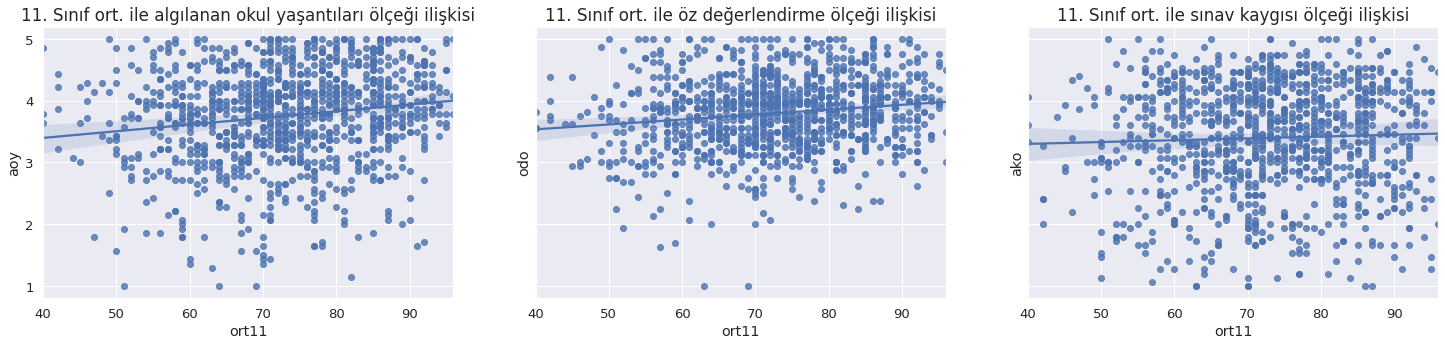

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,5), sharey=True)
#fig.suptitle('Tutum Ölçekleri ile 11. Sınıf Ortalaması İlişkileri')
sns.set(font_scale=1.4)
sns.regplot(ax=axes[0],x=df_total.ort11, y=df_total.aoy, ci=100).set_title("11. Sınıf ort. ile algılanan okul yaşantıları ölçeği ilişkisi");
#axes[0].set_title('Title of the first chart')
sns.regplot(ax=axes[1], x=df_total.ort11, y=df_total.odo, ci=100).set_title("11. Sınıf ort. ile öz değerlendirme ölçeği ilişkisi");
sns.regplot(ax=axes[2],x=df_total.ort11, y=df_total.ako, ci=100).set_title("11. Sınıf ort. ile sınav kaygısı ölçeği ilişkisi");

Burada elde edilen regresyon analizleri sonuçlarından anlamlı bir ilişki çıkarılamamıştır.

## Korelasyon Analizi

In [ ]:
x_reduced_col_names = df_total.corr().abs()["ort11"].nlargest(12).index
df_total[x_reduced_col_names].corr()

,ort11,ort10,turkce9,mat9,lgs_puani,ortaokul_puani,ders_calisma,ort9,cinsiyet,oyun,aoy,odo
ort11,1.000000,0.812049,0.620896,0.564581,0.548735,0.470903,0.318021,0.316828,-0.206806,-0.176105,0.158458,0.153087
ort10,0.812049,1.000000,0.685016,0.683687,0.663147,0.536872,0.335561,0.399940,-0.172304,-0.177935,0.155578,0.142875
turkce9,0.620896,0.685016,1.000000,0.582684,0.524121,0.457950,0.297209,0.328033,-0.201619,-0.203641,0.152192,0.133491
mat9,0.564581,0.683687,0.582684,1.000000,0.567203,0.446324,0.256546,0.325642,-0.071236,-0.088728,0.100081,0.096504
lgs_puani,0.548735,0.663147,0.524121,0.567203,1.000000,0.743584,0.230925,0.444281,-0.013302,-0.071469,0.062476,0.085965
ortaokul_puani,0.470903,0.536872,0.457950,0.446324,0.743584,1.000000,0.240453,0.234425,-0.064464,-0.076150,0.105224,0.110689
ders_calisma,0.318021,0.335561,0.297209,0.256546,0.230925,0.240453,1.000000,0.130239,-0.260115,-0.266336,0.238066,0.312996
ort9,0.316828,0.399940,0.328033,0.325642,0.444281,0.234425,0.130239,1.000000,-0.078768,-0.069294,0.069241,0.060962
cinsiyet,-0.206806,-0.172304,-0.201619,-0.071236,-0.013302,-0.064464,-0.260115,-0.078768,1.000000,0.425190,-0.077472,-0.036341
oyun,-0.176105,-0.177935,-0.203641,-0.088728,-0.071469,-0.076150,-0.266336,-0.069294,0.425190,1.000000,-0.085491,-0.110773


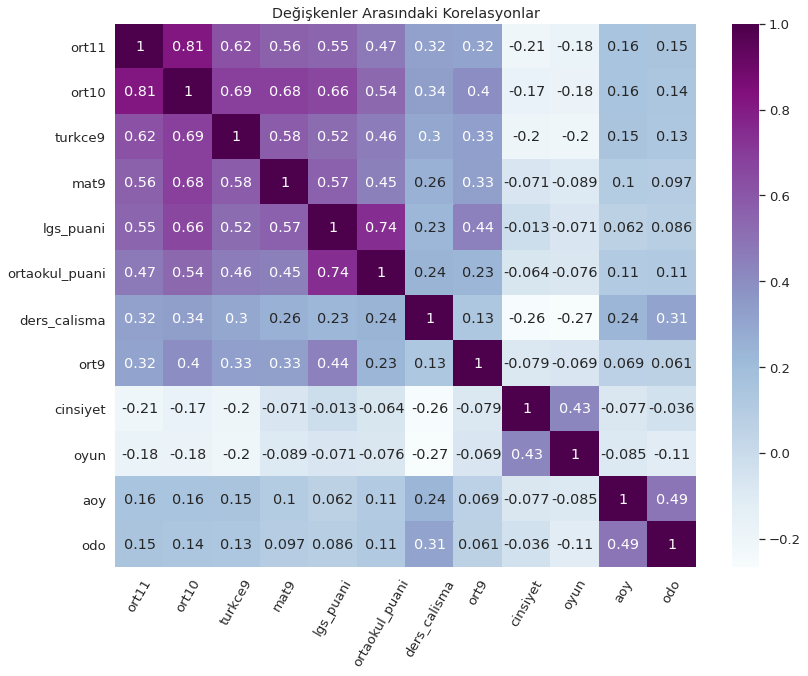

In [ ]:
plt.figure(figsize=(13,10))
correlation=df_total[x_reduced_col_names].corr()
sns.set(font_scale=1.2)

sns.heatmap(correlation, annot=True,cmap="BuPu");
plt.xticks(rotation=60)
plt.title("Değişkenler Arasındaki Korelasyonlar");

# Hipotez Testleri

##Korelasyon Testi
###Pearson's Korelasyon Katsayısı

İki örneğin doğrusal bir ilişkisi olup olmadığını test eder.

###Varsayımlar

* Her örnekteki gözlemler bağımsızdır ve aynı şekilde dağıtılmıştır.
* Her örnekteki gözlemler normal olarak dağıtılmıştır.
* Her örnekteki gözlemler aynı varyansa sahiptir.

###Yorumlama

* H0: iki örnek bağımsızdır.
* H1: Örnekler arasında bağımlılık vardır.

In [ ]:
aoy_values = df_total.aoy.values #algılanan okul yaşantıları ölçeği ortalaması
ortalama11 = df_total.ort11.values

stat, p = pearsonr(aoy_values, ortalama11)

print("stat= {:.3f}, p= {:.8f}".format(stat, p))

if p > 0.05:
  print("Algılanan okul yaşantıları ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımsızdır.")
else:
  print("Algılanan okul yaşantıları ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımlıdır.")

stat= 0.158, p= 0.00000016
Algılanan okul yaşantıları ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımlıdır.


In [ ]:
odo_values = df_total.odo.values #öz düzenleme ölçeği
ortalama11 = df_total.ort11.values

stat, p = pearsonr(odo_values, ortalama11)

print("stat= {:.3f}, p= {:.8f}".format(stat, p))

if p > 0.05:
  print("Öz düzenleme ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımsızdır.")
else:
  print("Öz düzenleme ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımlıdır.")

stat= 0.153, p= 0.00000041
Öz düzenleme ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımlıdır.


In [ ]:
ako_values = df_total.ako.values #ayda sınav kaygısı ölçeği
ortalama11 = df_total.ort11.values

stat, p = pearsonr(ako_values, ortalama11)

print("stat= {:.3f}, p= {:.8f}".format(stat, p))

if p > 0.05:
  print("Ayda sınav kaygısı ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımsızdır.")
else:
  print("Ayda sınav kaygısı ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımlıdır.")

stat= 0.039, p= 0.20349343
Ayda sınav kaygısı ölçeği ortalaması ve 11. sınıf ortalaması muhtemelen bağımsızdır.


**Hipotez testleri sonuçlarında Algılanan Okul Yaşantıları Ölçeği Ortalaması ve Öz Düzenleme Ölçeği Ortalaması, 11. Sınıf Not Ortalaması ile bağımlı çıktığından, bu değişkenler de makine öğrenmesinde kullanılacak değişkenlere eklenmiştir.**

#Makine Öğrenmesi

## Regresyon

In [ ]:
x = df_total
y = df_total.ort11

x = x[x_reduced_col_names]

#x.iloc[:, -2:] = x.iloc[:, -2:].astype("int64")
x.dtypes

ort11               int64
ort10               int64
turkce9             int64
mat9                int64
lgs_puani           int64
ortaokul_puani      int64
ders_calisma        int64
ort9                int64
cinsiyet            int64
oyun                int64
aoy               float64
odo               float64
dtype: object

In [ ]:
x = x.drop("ort11", axis=1)
y = df_total.ort11

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

#XGBoost

Structured veriler için en doğru sonuçları veren modelleme tekniği.

In [ ]:
XGB_model = XGBRegressor()

In [ ]:
XGB_model.fit(train_x, train_y)

[11:00:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = XGB_model.predict(val_x)
print('Eğitim doğruluğu :',XGB_model.score(train_x,train_y)*100)
print('Test doğruluğu :',XGB_model.score(val_x,val_y)*100)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Eğitim doğruluğu : 81.00760418163094
Test doğruluğu : 63.93712627900224
Mean Absolute Error: 5.307143770900599


In [ ]:
val_predictions = XGB_model.predict(val_x)

pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,74,75
1,79,74
2,55,50
3,79,86
4,74,80
5,78,84
6,59,65
7,73,73
8,71,71
9,72,77




---

# Classification

In [ ]:
def puan_olcegi(ort):
  for i in df_total[ort].index:
    if df_total[ort][i] >=0 and df_total[ort][i] <= 24:
      df_total[ort][i] = 0
    elif df_total[ort][i] >=25 and df_total[ort][i] <= 44:
      df_total[ort][i] = 1
    elif df_total[ort][i] >= 45 and df_total[ort][i] <=54:
      df_total[ort][i] = 2
    elif df_total[ort][i] >= 55 and df_total[ort][i] <=69:
      df_total[ort][i] = 3
    elif df_total[ort][i] >= 70 and df_total[ort][i] <=84:
      df_total[ort][i] = 4
    elif df_total[ort][i] >= 85 and df_total[ort][i] <=100:
      df_total[ort][i] = 5

In [ ]:
puan_olcegi(ort = "ort11")
puan_olcegi(ort = "ort10")
puan_olcegi(ort = "ort9")
puan_olcegi(ort = "turkce9")
puan_olcegi(ort = "mat9")
puan_olcegi(ort = "ortaokul_puani")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-pa

In [ ]:
df_total

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11,aoy,odo,ako
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,5,3,3,3,4,4,3.642857,3.9375,4.733333
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,4,3,2,3,4,4,3.000000,3.2500,4.400000
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,5,4,5,4,5,1,3.785714,3.8125,3.333333
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,4,2,1,3,3,3,1.785714,3.7500,3.933333
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,5,4,3,3,4,4,3.500000,3.3125,3.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0,1,1,1,1,1,1,3,4,1,1,3,3,0,0,0,3,3,1,2,3,1,0,0,0,0,0,439,5,5,4,4,4,4,4.714286,3.8125,4.200000
1080,0,1,1,1,1,1,1,5,6,0,1,4,3,0,0,3,2,2,2,2,3,0,1,1,0,0,0,426,5,4,4,4,4,4,4.642857,4.0625,3.266667
1081,1,1,1,1,1,1,1,3,3,0,2,1,2,1,0,3,1,2,2,1,3,0,0,1,0,1,1,410,5,4,4,4,4,4,4.071429,4.6875,2.666667
1082,0,1,1,1,1,1,1,3,4,0,1,2,3,0,0,2,3,1,2,1,2,0,0,0,0,0,0,407,5,3,3,4,4,4,4.571429,3.6875,4.333333


In [ ]:
x_cl = df_total #degiskenler
y_cl = df_total.ort11 #tahmin edilecek

In [ ]:
x_cl.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11,aoy,odo,ako
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,5,3,3,3,4,4,3.642857,3.9375,4.733333
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,4,3,2,3,4,4,3.000000,3.2500,4.400000
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,5,4,5,4,5,1,3.785714,3.8125,3.333333
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,4,2,1,3,3,3,1.785714,3.7500,3.933333
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,5,4,3,3,4,4,3.500000,3.3125,3.400000


In [ ]:
x_cl_reduced_col_names = x_cl.corr().abs()["ort11"].nlargest(12).index
x_cl[x_cl_reduced_col_names].corr()

,ort11,ort10,turkce9,lgs_puani,mat9,ortaokul_puani,ders_calisma,cinsiyet,aoy,odo,oyun,sosyal_kulturel
ort11,1.000000,0.687866,0.550705,0.505244,0.496863,0.340241,0.304530,-0.190352,0.154481,0.152816,-0.152130,-0.142278
ort10,0.687866,1.000000,0.609666,0.615815,0.619583,0.363483,0.329572,-0.152833,0.148849,0.120925,-0.169829,-0.137467
turkce9,0.550705,0.609666,1.000000,0.513990,0.552301,0.320632,0.286879,-0.189773,0.139753,0.124821,-0.194827,-0.081906
lgs_puani,0.505244,0.615815,0.513990,1.000000,0.553127,0.599989,0.230925,-0.013302,0.062476,0.085965,-0.071469,-0.052587
mat9,0.496863,0.619583,0.552301,0.553127,1.000000,0.311891,0.251580,-0.066322,0.102010,0.104544,-0.087543,-0.051771
ortaokul_puani,0.340241,0.363483,0.320632,0.599989,0.311891,1.000000,0.171703,-0.045425,0.089388,0.094928,-0.057641,-0.040670
ders_calisma,0.304530,0.329572,0.286879,0.230925,0.251580,0.171703,1.000000,-0.260115,0.238066,0.312996,-0.266336,-0.091883
cinsiyet,-0.190352,-0.152833,-0.189773,-0.013302,-0.066322,-0.045425,-0.260115,1.000000,-0.077472,-0.036341,0.425190,0.287557
aoy,0.154481,0.148849,0.139753,0.062476,0.102010,0.089388,0.238066,-0.077472,1.000000,0.487495,-0.085491,-0.015465
odo,0.152816,0.120925,0.124821,0.085965,0.104544,0.094928,0.312996,-0.036341,0.487495,1.000000,-0.110773,0.051739


In [ ]:
x_cl = x_cl[x_cl_reduced_col_names]
x_cl.dtypes

ort11                int64
ort10                int64
turkce9              int64
lgs_puani            int64
mat9                 int64
ortaokul_puani       int64
ders_calisma         int64
cinsiyet             int64
aoy                float64
odo                float64
oyun                 int64
sosyal_kulturel      int64
dtype: object

## Split Data

In [ ]:
x_cl = x_cl.drop("ort11", axis=1)
y_cl = df_total.ort11

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x_cl, y_cl, random_state=42)

##Specify and Fit the Model

### Support Vector Machine (SVM)

SVM sınıfları (özellikleri) bir hiper düzlemle bölen makine öğrenmesi algoritmasıdır.

In [ ]:
ort_svm = svm.SVC(kernel = "poly")
ort_svm.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_predict = ort_svm.predict(val_x)
valy = np.array(val_y)
svm_accuracy = accuracy_score(valy,svm_predict)
svm_accuracy = svm_accuracy*100
print("SVM Accuracy for ort dataset : %",svm_accuracy)

SVM Accuracy for ort dataset : % 47.601476014760145


### SVM Modelinin Sonuçlarının İncelenmesi

In [ ]:
val_predictions = ort_svm.predict(val_x)

print(val_predictions[:5], "\n")

print(val_y.head())

[4 4 4 4 3] 

693     4
56      4
299     2
1027    5
208     2
Name: ort11, dtype: int64


In [ ]:
pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,4,4
1,4,4
2,4,2
3,4,5
4,4,4
5,4,4
6,4,3
7,4,4
8,4,4
9,4,4


### Random Forest Classifier

In [ ]:
ort_randomforest = RandomForestClassifier(n_estimators = 600,
                                          max_features = "sqrt",
                                          max_depth = 4,
                                          min_samples_split = 0.27,
                                          min_samples_leaf=4,
                                          random_state=2) 
#n _estimators parametresiyle ormanda bulunmasını istediğimiz karar ağacı sayısını belirliyoruz.

ort_randomforest.fit(train_x,train_y)

randomforest_accuracy = ort_randomforest.score(val_x,val_y)*100
print('Random Forest Accuracy for ort dataset on test data : %',randomforest_accuracy)
print('Random Forest Accuracy for ort dataset on train data : %',ort_randomforest.score(train_x,train_y)*100)

Random Forest Accuracy for ort dataset on test data : % 61.99261992619927
Random Forest Accuracy for ort dataset on train data : % 61.746617466174655


### Random Forest Modelinin Sonuçlarının İncelenmesi

In [ ]:
val_predictions = ort_randomforest.predict(val_x)

pred = val_predictions[-20:].astype("int64")
org = val_y[-20:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,3,3
1,4,3
2,4,5
3,4,4
4,3,2
5,4,5
6,3,3
7,4,3
8,4,4
9,4,4
